In [72]:
import numpy as np
import matplotlib.pyplot as plt

x_initial = 0.5
b_range = 2
n = 300

def mapping(xn, b) -> float:
    return b * (1 - xn ** 2 + (xn ** 4) / 4)    # Derivative: b*x*(x**2-2)
    # return b * xn * (1 - xn)

def mapping_derivative(b, x):
    return b * x * (x**2 - 2)
    # return b - 2 * b * x

In [74]:
def get_mapping_graph_data(x0: float, b: float, n: int) -> np.array:
    """
    Calculates values of the mapping for the specified b by iterating it n times
    :return: np.array of the values
    """
    xn_array = np.zeros(n)
    xn_array[0] = x0

    for i in range(1, n):
        xn_array[i] = mapping(xn_array[i-1], b)
    return xn_array


def get_bifrucation_diagram_data_for_mapping(x0: float, b: int, n: int):
    """
    Calculates unique values of the mapping for the last 100 iterations.
    Used to plot a bifrucation diagram for a mapping.
    :return: np.array of unique values per each x value: [[0.0], [0.1], ..., [0.47, 0.53], ...]
    """
    b_array = np.arange(0, b, 0.001)
    xn_array = np.empty(len(b_array), np.object_)

    for i in range(len(b_array)):
        xn_data = get_mapping_graph_data(x0, b_array[i], n)
        xn_array[i] = np.array([*set(xn_data[-100:-1])])

    return xn_array


def calculate_lyapunov_exponent(x0, b, n):
    """
    Calculates (estimates) Lyapunov exponent using 200 "iterations" of the limit
    :return: lyapunov exponent
    """
    sum = 0
    xn_array = get_mapping_graph_data(x0, b, n)[99:-1]

    for i in range(n-100):
        sum += np.log(np.abs(mapping_derivative(b, xn_array[i])))
    return sum * 1/(n - 100)


def get_lyapunov_exponent_data_for_mapping(x0, b_range, n):
    """
    Calculates Lyapunox exponent for each value of the variable 'b' in the specified range.
    :return: np.array of lyambda values
    """
    b_array = np.arange(0, b_range, 0.01)
    lambda_array = np.zeros((len(b_array)))

    for b, i in zip(b_array, range(len(b_array))):
        lambda_array[i] = calculate_lyapunov_exponent(x0, b, n)
    return lambda_array

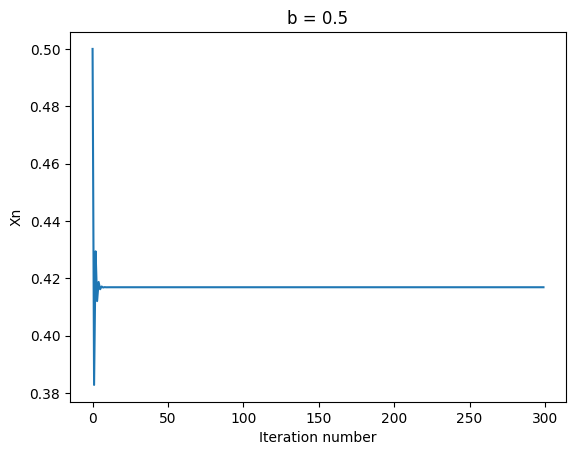

In [109]:
data = get_mapping_graph_data(x_initial, 0.5, n)
x_array = np.arange(n)
plt.title('b = 0.5')
plt.xlabel('Iteration number')
plt.ylabel('Xn')
plt.plot(x_array, data)

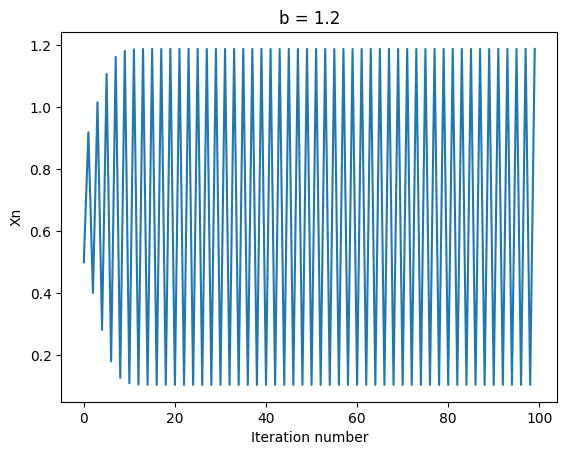

In [110]:
data = get_mapping_graph_data(x_initial, 1.2, n)
plt.title('b = 1.2')
plt.xlabel('Iteration number')
plt.ylabel('Xn')
plt.plot(x_array[:100], data[:100])

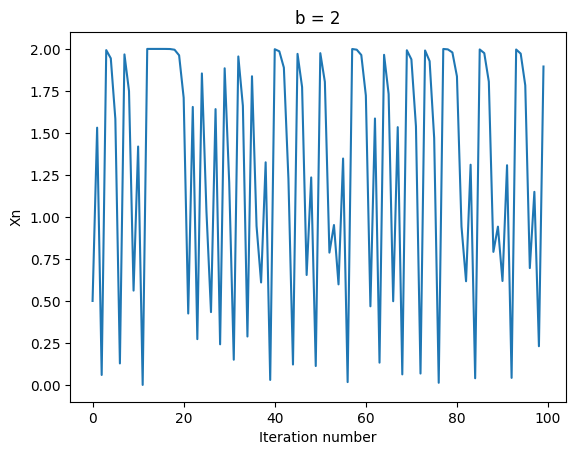

In [111]:
data = get_mapping_graph_data(x_initial, 2, n)
plt.title('b = 2')
plt.xlabel('Iteration number')
plt.ylabel('Xn')
plt.plot(x_array[:100], data[:100])

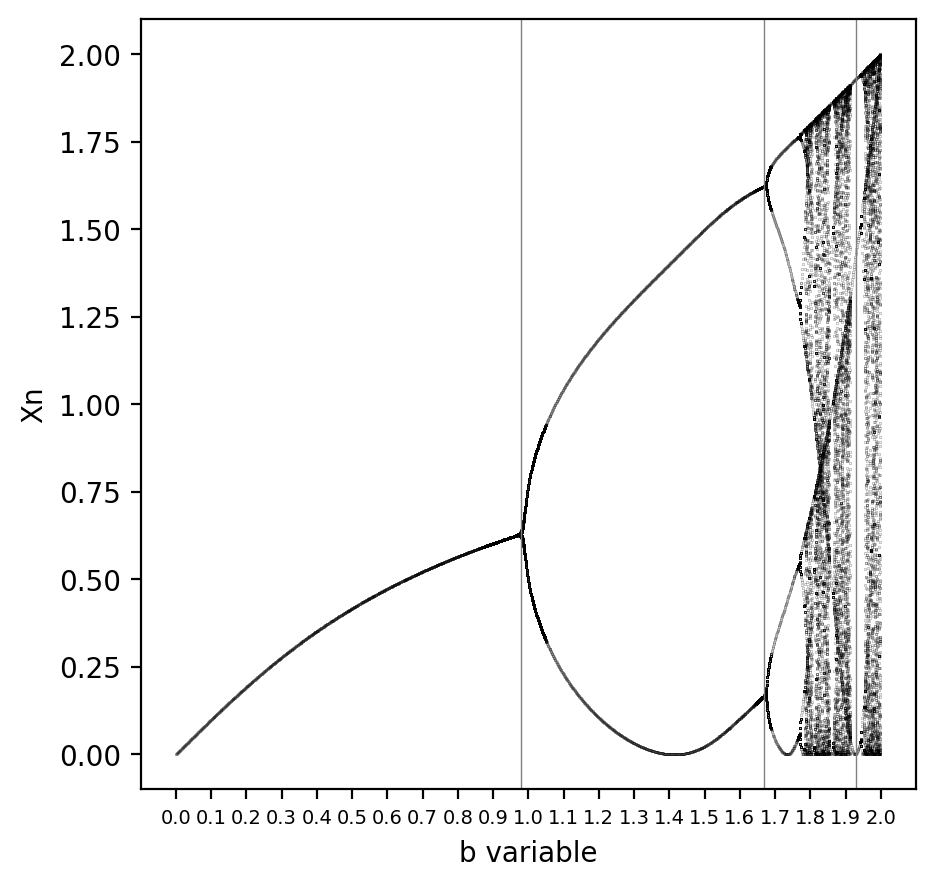

In [106]:
y_data = get_bifrucation_diagram_data_for_mapping(x_initial, b_range, n)
x_data = np.arange(0, b_range, 0.001)
plt.figure(figsize=(5, 5), dpi=200)
plt.xticks(x_data[::100], fontsize=7)
plt.xticks(list(plt.xticks()[0]) + [2.0], fontsize=7)
plt.axvline(x=0.98, lw=0.5, color='gray')
plt.axvline(x=1.67, lw=0.5, color='gray')
plt.axvline(x=1.93, lw=0.5, color='gray')
plt.xlabel('b variable')
plt.ylabel('Xn')
for x, y in zip(x_data, y_data):
    plt.scatter([x] * len(y), y, s=0.005, color='black')

/tmp/ipykernel_48301/1505883501.py:26: RuntimeWarning: divide by zero encountered in log
  sum += np.log(np.abs(mapping_derivative(b, xn_array[i])))


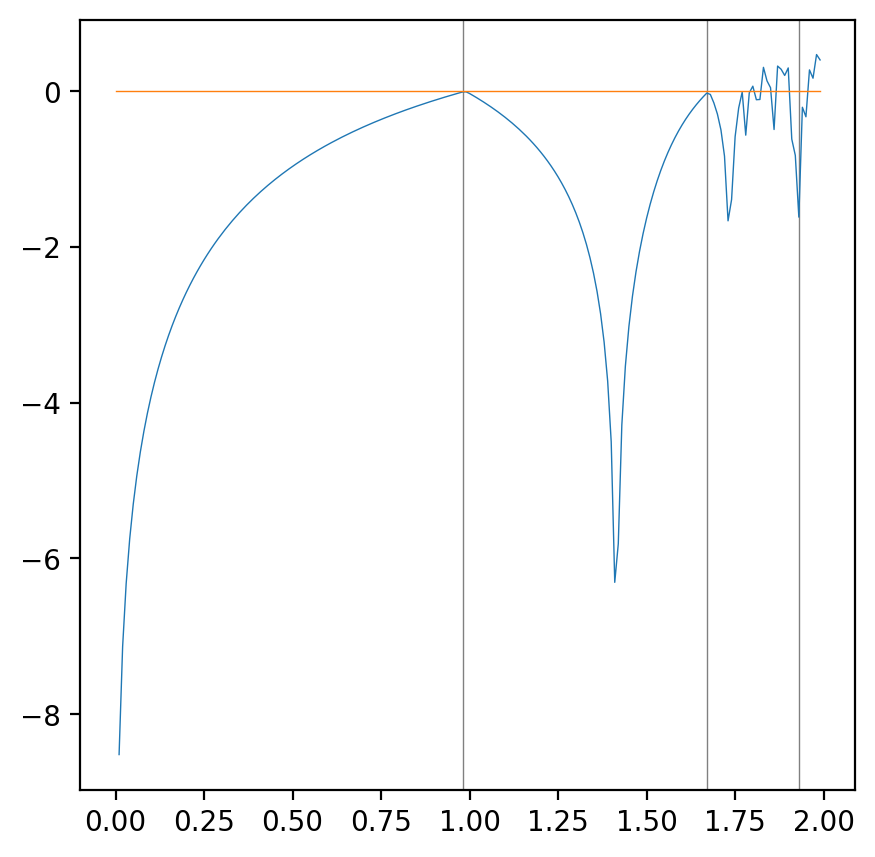

In [108]:
l_array = get_lyapunov_exponent_data_for_mapping(x_initial, b_range, n)
b_array = np.arange(0, b_range, 0.01)
plt.figure(figsize=(5, 5), dpi=200)
plt.axvline(x=0.98, lw=0.5, color='gray')
plt.axvline(x=1.67, lw=0.5, color='gray')
plt.axvline(x=1.93, lw=0.5, color='gray')
plt.plot(b_array, l_array, linewidth=0.5)
plt.plot(b_array, np.full(len(b_array), 0), linewidth=0.5)